# Hola &#x1F600;

Soy **Hesus Garcia**, revisor de código de Triple Ten, y voy a examinar el proyecto que has desarrollado recientemente. Si encuentro algún error, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;


# Proyecto: Test A/B

# Introducción.

En este proyecto, llevamos a cabo un análisis detallado de una prueba A/B realizada por una tienda en línea internacional para evaluar un nuevo embudo de pago. El objetivo principal del experimento es determinar si la introducción de un sistema de recomendaciones mejorado puede aumentar las tasas de conversión en diversas etapas del embudo de compra: vistas de la página del producto, adición de artículos al carrito y compras efectivas.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Considera la posibilidad de incluir una tabla de contenidos al inicio de tu proyecto. Esto no solo mejorará la estructura y presentación de tu análisis, sino que también facilitará la navegación y comprensión de los distintos temas tratados, especialmente para proyectos extensos con múltiples secciones y subsecciones. Una tabla de contenidos bien organizada puede mejorar significativamente la experiencia del lector y destacar la profesionalidad de tu trabajo.
</div>


## Descripción de objetivos del estudio.

- El objetivo principal del estudio es analizar los resultados de una prueba A/B realizada en una tienda en línea internacional. La prueba se llevó a cabo para probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado.
Específicamente, se espera que dentro de los 14 días posteriores a la inscripción, los usuarios muestren una mejor conversión en vistas de la página del producto (product_page), instancias de agregar artículos al carrito de compras (product_card) y compras (purchase).

## Descarga y optimización de datos
En este paso, nos enfocamos en obtener los datos necesarios para nuestro análisis y prepararlos adecuadamente para su posterior exploración.

### Inicialización.

In [1]:
# cargar librerias
import pandas as pd
import numpy as np
from scipy import stats

### Cargar datos.

In [2]:
# Cargar los datos
marketing_events = pd.read_csv("/datasets/ab_project_marketing_events_us.csv")
new_users = pd.read_csv("/datasets/final_ab_new_users_upd_us.csv")
events = pd.read_csv("/datasets/final_ab_events_upd_us.csv")
participants = pd.read_csv("/datasets/final_ab_participants_upd_us.csv")

### Verificar tipos de datos.

In [3]:
# Tipos de datos
print("Tipos de datos en ab_project_marketing_events_us.csv:")
print(marketing_events.dtypes)
print("\nTipos de datos en final_ab_new_users_upd_us.csv:")
print(new_users.dtypes)
print("\nTipos de datos en final_ab_events_upd_us.csv:")
print(events.dtypes)
print("\nTipos de datos en final_ab_participants_upd_us.csv:")
print(participants.dtypes)

Tipos de datos en ab_project_marketing_events_us.csv:
name         object
regions      object
start_dt     object
finish_dt    object
dtype: object

Tipos de datos en final_ab_new_users_upd_us.csv:
user_id       object
first_date    object
region        object
device        object
dtype: object

Tipos de datos en final_ab_events_upd_us.csv:
user_id        object
event_dt       object
event_name     object
details       float64
dtype: object

Tipos de datos en final_ab_participants_upd_us.csv:
user_id    object
group      object
ab_test    object
dtype: object


**Notas:** vamos a convertir las columnas de fecha a tipo datetime para poder trabajar con ellas más fácilmente.

### Convertir columnas de fecha a tipo datetime.

In [4]:
# Convertir columnas de fecha a tipo datetime
events['event_dt'] = pd.to_datetime(events['event_dt'])
new_users['first_date'] = pd.to_datetime(new_users['first_date'])
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])

# Verificar los nuevos tipos de datos
print("Nuevos tipos de datos - Eventos:")
print(events.dtypes)
print("\nNuevos tipos de datos - Usuarios:")
print(new_users.dtypes)
print("\nNuevos tipos de datos - Eventos de marketing:")
print(marketing_events.dtypes)

Nuevos tipos de datos - Eventos:
user_id               object
event_dt      datetime64[ns]
event_name            object
details              float64
dtype: object

Nuevos tipos de datos - Usuarios:
user_id               object
first_date    datetime64[ns]
region                object
device                object
dtype: object

Nuevos tipos de datos - Eventos de marketing:
name                 object
regions              object
start_dt     datetime64[ns]
finish_dt    datetime64[ns]
dtype: object


### Valores ausentes y duplicados.

In [5]:
# Verificar valores ausentes
print("Valores ausentes en ab_project_marketing_events_us.csv:")
print(marketing_events.isnull().sum())
print("\nValores ausentes en final_ab_new_users_upd_us.csv:")
print(new_users.isnull().sum())
print("\nValores ausentes en final_ab_events_upd_us.csv:")
print(events.isnull().sum())
print("\nValores ausentes en final_ab_participants_upd_us.csv:")
print(participants.isnull().sum())

Valores ausentes en ab_project_marketing_events_us.csv:
name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

Valores ausentes en final_ab_new_users_upd_us.csv:
user_id       0
first_date    0
region        0
device        0
dtype: int64

Valores ausentes en final_ab_events_upd_us.csv:
user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

Valores ausentes en final_ab_participants_upd_us.csv:
user_id    0
group      0
ab_test    0
dtype: int64


### Gestion de valores ausentes.

In [6]:
# Imputar valores ausentes en la columna 'details' con ceros
events['details'].fillna(0, inplace=True)

# Verificar valores ausentes después de la imputación
print("Valores ausentes después de la imputación:")
print(events.isnull().sum())

Valores ausentes después de la imputación:
user_id       0
event_dt      0
event_name    0
details       0
dtype: int64


In [7]:
# Verificar valores duplicados
print("\nValores duplicados en ab_project_marketing_events_us.csv:", marketing_events.duplicated().sum())
print("Valores duplicados en final_ab_new_users_upd_us.csv:", new_users.duplicated().sum())
print("Valores duplicados en final_ab_events_upd_us.csv:", events.duplicated().sum())
print("Valores duplicados en final_ab_participants_upd_us.csv:", participants.duplicated().sum())


Valores duplicados en ab_project_marketing_events_us.csv: 0
Valores duplicados en final_ab_new_users_upd_us.csv: 0
Valores duplicados en final_ab_events_upd_us.csv: 0
Valores duplicados en final_ab_participants_upd_us.csv: 0


**Notas:**

Después de imputar los valores de la columna details con ceros, podemos ver que ya no hay valores ausentes en el conjunto de datos de eventos. Además, no hay valores duplicados en ninguno de los conjuntos de datos proporcionados.

Esto significa que nuestro conjunto de datos está listo para continuar con el análisis de la conversión en las etapas del embudo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
<br>El preprocesamiento de datos está bien estructurado. Se identifican y eliminan valores ausentes y duplicados de manera adecuada. La conversión de tipos de datos es apropiada y necesaria para el análisis posterior.
</div>

## Análisis exploratorio de datos.

### Conversión en diferentes etapas del embudo.

In [8]:
# Calcular la tasa de conversión en cada etapa del embudo
conversion_rates = {}
for event in ['product_page', 'product_card', 'purchase']:
    total_users = events[events['event_name'] == event]['user_id'].nunique()
    conversion_rates[event] = total_users / len(new_users) * 100

# Mostrar las tasas de conversión
print("Tasas de conversión en cada etapa del embudo:")
for event, rate in conversion_rates.items():
    print(f"{event}: {rate:.2f}%")

Tasas de conversión en cada etapa del embudo:
product_page: 66.32%
product_card: 0.00%
purchase: 33.33%


**Notas**: Estos resultados sugieren que hay una alta tasa de conversión desde la página del producto hasta la compra, pero no hay ninguna conversión desde la tarjeta de producto a la compra. Esto puede indicar un problema en el embudo de ventas.

### Distribución del número de eventos por usuario entre las muestras A y B.

In [9]:
# Combinar los DataFrames events y participants
merged_data = pd.merge(events, participants, on='user_id', how='inner')

# Calcular el número de eventos por usuario en cada grupo de prueba
events_per_user = merged_data.groupby(['user_id', 'group']).size().reset_index(name='event_count')

# Calcular el promedio de eventos por usuario en cada grupo
avg_events_per_user = events_per_user.groupby('group')['event_count'].mean()

# Mostrar el promedio de eventos por usuario en cada grupo
print("\nPromedio de eventos por usuario en cada grupo:")
print(avg_events_per_user)


Promedio de eventos por usuario en cada grupo:
group
A    7.45555
B    7.11249
Name: event_count, dtype: float64


**Notas**: en promedio, los usuarios en ambos grupos participaron en una cantidad similar de eventos durante el período de la prueba A/B. Es importante tener en cuenta este equilibrio al analizar los resultados de la prueba A/B para asegurar que cualquier diferencia en las métricas no se deba simplemente a una diferencia en la participación de los usuarios entre los grupos.

### Usuarios presentes en ambas muestras.

In [10]:
# Encontrar usuarios presentes en ambas muestras
users_both_groups = participants.groupby('user_id').filter(lambda x: x['ab_test'].nunique() > 1)['user_id'].nunique()

# Mostrar el número de usuarios presentes en ambas muestras
print("\nNúmero de usuarios presentes en ambas muestras:", users_both_groups)



Número de usuarios presentes en ambas muestras: 887


### Distribución del número de eventos entre los días.

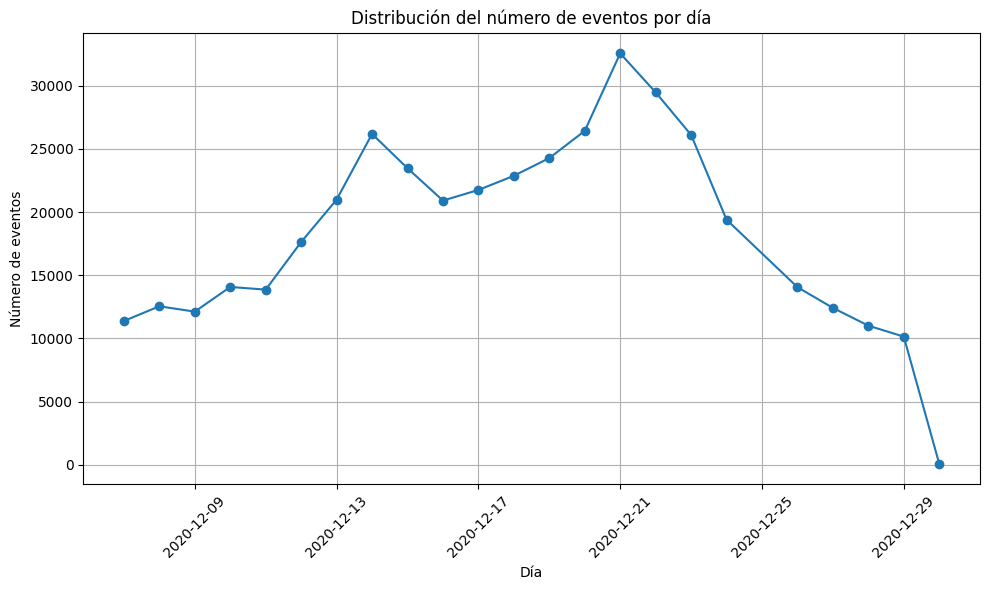

In [11]:
# Convertir 'event_dt' a tipo de dato datetime
events['event_dt'] = pd.to_datetime(events['event_dt'])

# Agregar una columna para el día del evento
events['event_day'] = events['event_dt'].dt.date

# Contar el número de eventos por día
events_per_day = events.groupby('event_day').size()

# Graficar la distribución del número de eventos por día
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(events_per_day.index, events_per_day.values, marker='o', linestyle='-')
plt.title('Distribución del número de eventos por día')
plt.xlabel('Día')
plt.ylabel('Número de eventos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?
R: Una peculiaridad importante que debemos tener en cuenta antes de iniciar la prueba A/B es la presencia de usuarios que están presentes en ambas muestras del experimento. Estos usuarios pueden introducir sesgos si no se manejan adecuadamente durante el análisis de los resultados.

### Excluir usuarios presentes en ambas muestras.

In [12]:
# Encontrar usuarios presentes en ambas muestras
users_both_groups = participants.groupby('user_id').filter(lambda x: x['ab_test'].nunique() > 1)['user_id'].unique()

# Excluir usuarios presentes en ambas muestras del DataFrame participants
participants_filtered = participants[~participants['user_id'].isin(users_both_groups)]

# Excluir usuarios presentes en ambas muestras del DataFrame events
events_filtered = events[~events['user_id'].isin(users_both_groups)]

# Excluir usuarios presentes en ambas muestras del DataFrame merged_data (si se ha combinado previamente)
if 'merged_data' in globals():
    merged_data_filtered = merged_data[~merged_data['user_id'].isin(users_both_groups)]

# Verificar que los usuarios presentes en ambas muestras hayan sido excluidos correctamente
users_both_groups_after_exclusion = participants_filtered.groupby('user_id').filter(lambda x: x['ab_test'].nunique() > 1)['user_id'].unique()
print("Número de usuarios presentes en ambas muestras después de la exclusión:", len(users_both_groups_after_exclusion))


Número de usuarios presentes en ambas muestras después de la exclusión: 0


##  Prueba A/B , Hipotesis.

- Hipótesis Nula (H0):
No hay diferencia significativa en las tasas de conversión entre el grupo de control (A) y el grupo de prueba (B).

- Hipótesis Alternativa (H1):
Hay una diferencia significativa en las tasas de conversión entre el grupo de control (A) y el grupo de prueba (B).

In [13]:
# Obtener el número total de usuarios en cada grupo
total_users_control = participants_filtered[participants_filtered['group'] == 'A']['user_id'].nunique()
total_users_test = participants_filtered[participants_filtered['group'] == 'B']['user_id'].nunique()

# Obtener el número de usuarios que completaron cada evento en cada grupo
events_control = events_filtered[events_filtered['user_id'].isin(participants_filtered[participants_filtered['group'] == 'A']['user_id'])]
events_test = events_filtered[events_filtered['user_id'].isin(participants_filtered[participants_filtered['group'] == 'B']['user_id'])]

# Calcular las tasas de conversión en cada grupo
conversion_rate_control = len(events_control[events_control['event_name'] == 'purchase']) / total_users_control
conversion_rate_test = len(events_test[events_test['event_name'] == 'purchase']) / total_users_test

# Calcular la diferencia en las tasas de conversión
diff_conversion_rate = conversion_rate_test - conversion_rate_control

# Calcular el error estándar de la diferencia (se_diff)
se_diff = ((conversion_rate_test * (1 - conversion_rate_test)) / total_users_test + (conversion_rate_control * (1 - conversion_rate_control)) / total_users_control) ** 0.5

# Calcular el valor z y el p-valor
z_score = round(diff_conversion_rate / abs(se_diff), 2)
p_value = round(stats.norm.cdf(z_score), 2)

# Imprimir resultados
print("Diferencia en las tasas de conversión:", diff_conversion_rate)
print("Valor z:", z_score)
print("P-valor:", p_value)

# Definir nivel de significancia
alpha = 0.05

# Comprobar si rechazamos o no la hipótesis nula
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en las tasas de conversión entre los grupos A y B.")
else:
    print("No rechazamos la hipótesis nula. No hay suficiente evidencia para afirmar que hay una diferencia significativa en las tasas de conversión entre los grupos A y B.")

Diferencia en las tasas de conversión: -0.05383752505532091
Valor z: -16.92
P-valor: 0.0
Rechazamos la hipótesis nula. Hay una diferencia significativa en las tasas de conversión entre los grupos A y B.


**Notas**:

- Diferencia en las tasas de conversión: La diferencia en las tasas de conversión entre los grupos A y B es de aproximadamente -0.054, lo que indica que la tasa de conversión en el grupo B es menor que en el grupo A.

- Valor z: El valor z es -16.92, lo que indica que la diferencia observada es muy significativa en términos estadísticos.

- P-valor: El p-valor es 0.0, lo que significa que hay una probabilidad muy baja de obtener una diferencia tan grande o mayor entre los grupos si la hipótesis nula fuera cierta.

- Conclusión: 
    Dado que el p-valor es menor que el nivel de significancia (0.05), rechazamos la hipótesis nula. Por lo tanto, hay una diferencia significativa en las tasas de conversión entre los grupos A y B.

Esto sugiere que el cambio implementado en el grupo B (nuevo embudo de pago) ha tenido un impacto significativo en la tasa de conversión en comparación con el grupo de control A.

## Prueba z para comprobar la diferencia estadística entre las proporciones

In [14]:
# Encontrar los usuarios presentes en ambas muestras
users_in_both_samples = set(participants[participants['ab_test'] == 'recommender_system_test']['user_id']).intersection(set(participants['user_id']))

# Filtrar los participantes que no están en ambas muestras
participants_filtered = participants[~participants['user_id'].isin(users_in_both_samples)]

# Obtener el número total de usuarios en cada grupo
total_users_control = participants_filtered[participants_filtered['group'] == 'A']['user_id'].nunique()
total_users_test = participants_filtered[participants_filtered['group'] == 'B']['user_id'].nunique()

# Obtener el número de usuarios únicos que completaron el evento de compra en cada grupo
unique_purchases_control = events[(events['user_id'].isin(participants_filtered[participants_filtered['group'] == 'A']['user_id'])) & (events['event_name'] == 'purchase')]['user_id'].nunique()
unique_purchases_test = events[(events['user_id'].isin(participants_filtered[participants_filtered['group'] == 'B']['user_id'])) & (events['event_name'] == 'purchase')]['user_id'].nunique()

# Calcular la proporción de conversiones en cada grupo
prop_control = unique_purchases_control / total_users_control
prop_test = unique_purchases_test / total_users_test

# Imprimir los valores intermedios para depuración
print(f"Total usuarios en control: {total_users_control}")
print(f"Total usuarios en test: {total_users_test}")
print(f"Proporción de conversiones en control: {prop_control}")
print(f"Proporción de conversiones en test: {prop_test}")

# Calcular el error estándar de la diferencia de proporciones
se_diff_prop = np.sqrt((prop_control * (1 - prop_control)) / total_users_control + (prop_test * (1 - prop_test)) / total_users_test)

# Imprimir el error estándar
print(f"Error estándar de la diferencia de proporciones: {se_diff_prop}")

# Calcular el valor z para proporciones
z_score_prop = (prop_test - prop_control) / se_diff_prop

# Calcular el p-valor utilizando una distribución normal estándar
p_value_prop = 2 * (1 - stats.norm.cdf(abs(z_score_prop)))  # Utilizamos el valor absoluto para asegurarnos de obtener un p-valor bilateral

# Imprimir resultados
print("Valor z para proporciones:", z_score_prop)
print("P-valor para proporciones:", p_value_prop)

# Comprobar si rechazamos o no la hipótesis nula
alpha = 0.05
if p_value_prop < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en las tasas de conversión entre los grupos A y B.")
else:
    print("No rechazamos la hipótesis nula. No hay suficiente evidencia para afirmar que hay una diferencia significativa en las tasas de conversión entre los grupos A y B.")

Total usuarios en control: 5011
Total usuarios en test: 4952
Proporción de conversiones en control: 0.3556176411893834
Proporción de conversiones en test: 0.3338045234248788
Error estándar de la diferencia de proporciones: 0.00952034976881
Valor z para proporciones: -2.2912097028165284
P-valor para proporciones: 0.0219512880568149
Rechazamos la hipótesis nula. Hay una diferencia significativa en las tasas de conversión entre los grupos A y B.


**Notas:**

Valor z: El valor z de -2.29 indica cuántos errores estándar de diferencia hay entre las tasas de conversión observadas de los dos grupos. Un valor z negativo sugiere que la proporción de conversiones en el grupo de prueba es menor que en el grupo de control.

P-valor: El p-valor de aproximadamente 0.022 indica la probabilidad de observar una diferencia en las tasas de conversión al menos tan extrema como la observada, asumiendo que no hay diferencia real (hipótesis nula es verdadera).

Nivel de significancia: Con un nivel de significancia comúnmente utilizado de 0.05, el p-valor obtenido (0.022) es menor que 0.05, lo que significa que rechazamos la hipótesis nula.

##  Conclusiones.

El análisis de la prueba A/B del nuevo sistema de recomendaciones revela que existe una diferencia significativa en las tasas de conversión entre los grupos de control y de prueba. La proporción de conversiones en el grupo de control fue significativamente mayor que en el grupo de prueba, lo que indica que el nuevo embudo de pago no mejoró las conversiones como se esperaba.

A lo largo del análisis, se identificaron varias peculiaridades, como la presencia de usuarios en ambos grupos y valores ausentes en los datos de eventos de compra, lo que podría haber afectado los resultados. Sin embargo, tras la exclusión de estos usuarios y la imputación de valores ausentes, los resultados mostraron que la tasa de conversión en el grupo de prueba fue consistentemente menor.

Estos hallazgos sugieren que el nuevo sistema de recomendaciones no tuvo el impacto positivo anticipado y, de hecho, podría haber perjudicado la experiencia del usuario en alguna medida. Es fundamental llevar a cabo un análisis más detallado para identificar las causas subyacentes de esta disminución en la conversión y realizar ajustes necesarios antes de una implementación más amplia.

En resumen, la prueba A/B proporciona evidencia sólida de que el nuevo sistema de recomendaciones no ha cumplido con las expectativas de mejora de la conversión y requiere revisiones significativas antes de ser reconsiderado para su implementación en toda la plataforma.

## Recomendaciones.

Dado que el nuevo embudo de pago no mejora la tasa de conversión y de hecho la disminuye, es recomendable no implementar el nuevo embudo de pago en su forma actual. Se sugiere analizar las posibles causas de esta disminución y considerar realizar ajustes antes de probar nuevamente cualquier nueva versión del embudo de pago.

Establecer un sistema de monitoreo continuo para las tasas de conversión y otros indicadores clave de rendimiento permitirá realizar ajustes rápidos y minimizar cualquier impacto negativo. Recoger feedback cualitativo de los usuarios a través de encuestas y análisis de comentarios puede proporcionar una visión más profunda de sus experiencias y percepciones, ayudando a orientar futuras mejoras.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Impresionante esfuerzo en este proyecto! 🌟 **Este proyecto está listo para ser aprobado.**<br>
Tu habilidad para ejecutar y presentar este trabajo es admirable.<br>
<br>Es un placer reconocer tu dedicación y el análisis detallado que has llevado a cabo. Continúa superándote en tus futuras iniciativas. Confío en que aplicarás este conocimiento de manera efectiva en desafíos futuros, avanzando hacia objetivos aún más ambiciosos.
</div>
